# Hessian Analysis of Convex Quadratic Problem

This notebook is gradient descent and Newton's method applied to problem described in Chapter 5

In [ ]:
import numpy as np

### Generate Positive Definite Matrix

Following code generates Positive definite matrix with a specific condition number by QR Decomposition and Diagonalisation.

In [ ]:
def generate_positive_definite_matrix(dim, condition_number):
    #Random Orthogonal Matrix
    Q, _ = np.linalg.qr(np.random.randn(dim, dim))
    
    #Generate eigenvalues based on condition number
    min_eigenvalue = 1/np.sqrt(condition_number) 
    max_eigenvalue = condition_number * min_eigenvalue  
    
    #Linspace of Eigenvalues
    eigenvalues = np.linspace(min_eigenvalue, max_eigenvalue, dim)
    
    #Use Q and D to create positive definite non diagonal matrix
    Lambda = np.diag(eigenvalues)  
    A = Q @ Lambda @ Q.T  
    
    return A



Generates all the positive definite matrix with the same dimension but different condition numbers

In [55]:
A=generate_positive_definite_matrix(100,1)
B=generate_positive_definite_matrix(100,100)
C=generate_positive_definite_matrix(100,1000)
D=generate_positive_definite_matrix(100,10000)
Matlist=[A,B,C,D]
condList=[1,100,1000,10000]
lr=[.01,.01,.01,.001,.0001,.00001]

Defines function we wish to optimize

In [56]:
h=np.random.uniform(0,5,100)
def f(x,A):
    return .5*x.T@A@x-h.T@x

def df(x,A):
    return A@x-h


### Graph and Algorithm for Gradient Descent

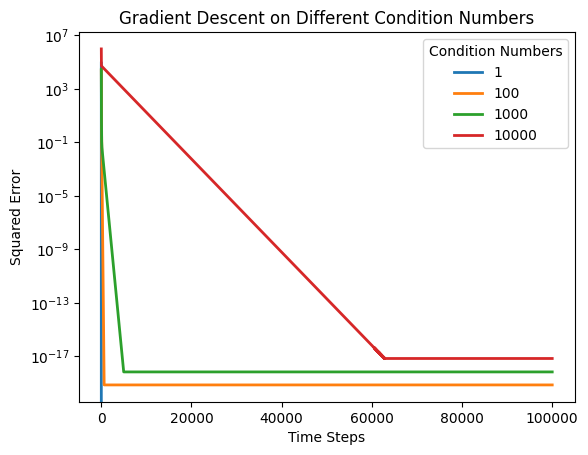

In [58]:
import matplotlib.pyplot as plt
arr=[]
#Actual Solution


for i in range(len(Matlist)):
    y=f(np.linalg.inv(Matlist[i])@h,Matlist[i])
    arr=[]
    x=np.random.uniform(0,1,100)


    for j in range(100000):
        arr.append(f(x,Matlist[i]))
        
        Df=df(x,Matlist[i])
        lr= Df.T@Df/(Df.T@Matlist[i]@Df)
        if np.linalg.norm(Df)>1e-5:
            x=x-lr*Df
        
        
    
    arr2= [(i-y)**2 for i in arr]
    plt.plot(np.arange(len(arr2)),arr2,label=condList[i],lw=2)

plt.yscale('log')
plt.title("Gradient Descent on Different Condition Numbers")
plt.legend(title="Condition Numbers")
plt.ylabel("Squared Error")
plt.xlabel("Time Steps")
plt.savefig("QuadOptim.png")
plt.show()



### Graph and Algorithm for Newton's method

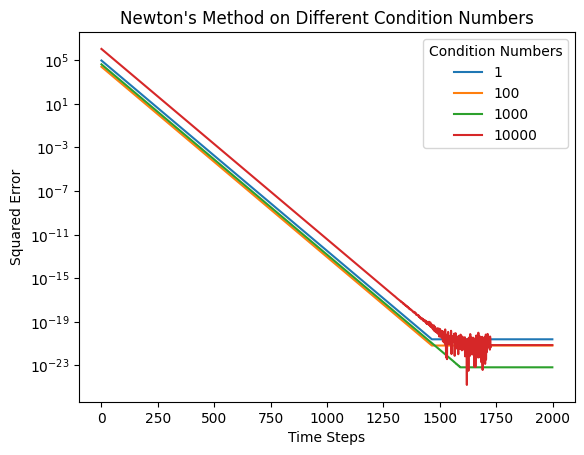

In [64]:
import matplotlib.pyplot as plt
arr=[]
for i in range(len(Matlist)):
    arr=[]
    x=np.random.uniform(0,1,100)
    H=np.linalg.inv(Matlist[i])

    for j in range(2000):
        arr.append(f(x,Matlist[i]))
        Df=df(x,Matlist[i])
        if np.linalg.norm(Df)>1e-5:
            x=x-.01*H@df(x,Matlist[i])
        
        
    y=f(np.linalg.inv(Matlist[i])@h,Matlist[i])
    arr2= [(i-y)**2 for i in arr]
    plt.plot(np.arange(len(arr2)),arr2,label=condList[i])

plt.yscale('log')
plt.title("Newton's Method on Different Condition Numbers")
plt.legend(title="Condition Numbers")
plt.ylabel("Squared Error")
plt.xlabel("Time Steps")
plt.savefig("QuadOptimNewton.png")
plt.show()